# 颜色空间变换


## 目标

* 颜色空间变换，如BGR<-->Gray，BGR<-->HSV等
* 追踪视频中特定颜色的物体
* 函数：cv2.cvtColor(),cv2.inRange()

## 正文

### 颜色空间变换

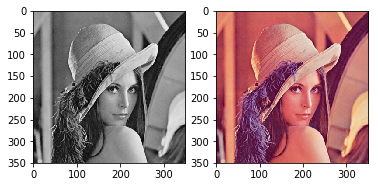

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

img=cv2.imread('lena.jpg')
# 转化为灰度图
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(121)
plt.imshow(gray,cmap=plt.cm.gray)
plt.subplot(122)
img_plt=cv2.merge((img[:,:,2],img[:,:,1],img[:,:,0]))
plt.imshow(img_plt)
plt.show()

cv2.cvtColor()用来进行颜色模型转换，参数1是要转换的图片，参数2是转换模式， COLOR_BGR2GRAY表示BGR→Gray，可用下面的代码显示所有的转换模式：

灰度化最常用的是：gray=R\*0.299+G\*0.587+B*0.114

In [19]:
flags=[i for i in dir(cv2) if i.startswith('COLOR_BGR')]
print(flags)

['COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR2YUV', 'COLOR_BGR2YUV_I420', 'COLOR_BGR2YUV_IYUV', 'COLOR_BGR2YUV_YV12', 'COLOR_BGR5552BGR', 'COLOR_BGR5552BGRA', 'COLOR_BGR5552GRAY', 'COLOR_BGR5552RGB', 'COLOR_BGR5552RGBA', 'COLOR_BGR5652BGR', 'COLOR_BGR5652BGRA', 'COLOR_BGR5652GRAY', 'COLOR_BGR5652RGB', 'COLOR_BGR5652RGBA', 'COLOR_BGRA2BGR', 'COLOR_BGRA2BGR555', 'COLOR_BGRA2BGR565', 'COLOR_BGRA2GRAY', 'COLOR_BGRA2RGB', 'COLOR_BGRA2RGBA', 'COLOR_BGRA2YUV_I420', 'COLOR_BGRA2YUV_IYUV', 'COLOR_BGRA2YUV_YV12']


### 视频中特定颜色物体追踪

* HSV是一个常用于颜色识别的模型，相比BGR更易区分颜色，转换模式用COLOR_BGR2HSV表示.

OpenCV中色调H范围为[0,179]，饱和度S是[0,255]，明度V是[0,255]。虽然H的理论数值是0°~360°，但8位图像像素点的最大值是255，所以OpenCV中除以了2，某些软件可能使用不同的尺度表示，所以同其他软件混用时，记得归一化。

如下，实现一个使用HSV来进行显示视频中蓝色物体的例子，步骤如下;
* 捕获视频中一帧
* 从BGR到HSV转换
* 提取蓝色范围的物体
* 只显示蓝色物体

In [1]:
import cv2
import numpy as np
 
capture=cv2.VideoCapture('demo_video.mp4')

lower_blue=np.array([100,110,110])
upper_blue=np.array([130,255,255])

while(capture.isOpened()):
    # 1.读取一帧
    ret,frame=capture.read()
    
    # 2.从BGR到HSV转换
    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    # 3.inRange():介于Lower和upper之间的为白色，其余为黑色
    mask=cv2.inRange(hsv,lower_blue,upper_blue)
    
    #4. 只保留图纸蓝色部分
    res=cv2.bitwise_and(frame,frame,mask=mask)
    
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
    if cv2.waitKey(30)==ord('q'):
        break

error: OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [5]:
import cv2
import numpy as np
blue = np.uint8([[[255, 0, 0]]])
hsv_blue = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
print(hsv_blue)  # [[[120 255 255]]]
green = np.uint8([[[0, 255, 0]]])
hsv_green = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
print(hsv_green)  # [[[120 255 255]]]
red = np.uint8([[[0, 0, 255]]])
hsv_red = cv2.cvtColor(red, cv2.COLOR_BGR2HSV)
print(hsv_red)  # [[[120 255 255]]]

[[[120 255 255]]]
[[[ 60 255 255]]]
[[[  0 255 255]]]


## 练习
尝试在视频中同时提取红色、蓝色、绿色的物体，效果如下：
![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279207225/1546853974895_cNPYbFUUjE.jpg)

In [6]:
cv2.bitwise_and??

In [1]:
import cv2
import numpy as np

capture=cv2.VideoCapture('demo_video.mp4')

# 蓝色的范围
lower_blue=np.array([100,110,110])
upper_blue=np.array([130,255,255])
# 绿色的范围
lower_green = np.array([40, 90, 90])
upper_green = np.array([70, 255, 255])

# 红色的范围
lower_red = np.array([160, 120, 120])
upper_red = np.array([179, 255, 255])
while(capture.isOpened()):
    # 1.读取一帧
    ret,frame=capture.read()
    
    # 2.从BGR到HSV转换
    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    # 3.inRange():介于Lower和upper之间的为白色，其余为黑色
    mask_blue=cv2.inRange(hsv,lower_blue,upper_blue)
    mask_green=cv2.inRange(hsv,lower_green,upper_green)
    mask_red=cv2.inRange(hsv,lower_red,upper_red)
    
    mask=mask_blue+mask_green+mask_red
    
    #4. 只保留图纸蓝色部分
    res=cv2.bitwise_and(frame,frame,mask=mask)
    
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
    if cv2.waitKey(30)==ord('q'):
        break